In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from scipy.spatial import distance
from tesser import fit
from tesser import network
from tesser import util
from tesser import tasks

In [2]:
data_dir = "/home/rodrigo/Dropbox/tesser_successor/Data/"

In [3]:
# get community matrix
net = network.temp_node_info()
comm = 1 - distance.squareform(distance.pdist(net['comm'][:, None], 'hamming'))

In [4]:
induct_all = util.load_induct(data_dir)
struct_all = util.load_struct(data_dir)

In [8]:
struct_all.SubjNum.unique()

array([100, 101, 102, 103, 104, 105, 106, 108, 109, 110, 111, 112, 113,
       114, 115, 116, 117, 119, 120, 121, 122, 123, 124, 125, 126, 127,
       128, 129, 130, 131, 132, 133, 135, 136, 137, 138])

In [ ]:
fixed = {}
var_names = ['gamma', 'alpha', 'tau']
var_bounds = {'alpha': [0, 1], 'gamma': [0, 1], 'tau': [0, 10]}
fit.fit_induct(struct_all, induct_all, fixed, var_names, var_bounds,
               verbose=False)

In [ ]:
fixed = {'alpha': 0.3}
var_names = ['gamma', 'tau']
var_bounds = {'gamma': [0, 1], 'tau': [0, 10]}
fit.fit_induct(struct_all, induct_all, fixed, var_names, var_bounds,
               verbose=False)


In [ ]:
high =tasks.induct_avg_split_high(tasks.induct_avg_all(data_dir))
hp = high.participant

In [ ]:
struct_high_all = struct_all.copy()
s_all = struct_high_all[struct_high_all['SubjNum'].isin(list(hp))]


In [ ]:
induct_high_all = induct_all.copy()
i_all = induct_high_all[induct_high_all['SubjNum'].isin(list(hp))]

In [ ]:
# High performers

fixed = {}
var_names = ['gamma', 'alpha', 'tau']
var_bounds = {'alpha': [0, 1], 'gamma': [0, 1], 'tau': [0, 10]}
fit.fit_induct(s_all, i_all, fixed, var_names, var_bounds)

High performers as a group have a much lower likelihood -440.54


In [ ]:
# low performers
low =tasks.induct_avg_split_low(tasks.induct_avg_all(data_dir))
lp = low.participant

In [ ]:

struct_low_all = struct_all.copy()
s_all = struct_low_all[struct_low_all['SubjNum'].isin(list(lp))]

In [ ]:
induct_low_all = induct_all.copy()
i_all = induct_low_all[induct_low_all['SubjNum'].isin(list(lp))]

In [ ]:
# low performers logllikelihood 
fixed = {}
var_names = ['gamma', 'alpha', 'tau']
var_bounds = {'alpha': [0, 1], 'gamma': [0, 1], 'tau': [0, 10]}
fit.fit_induct(s_all, i_all, fixed, var_names, var_bounds)

Low performers as a group have a much lower likelihood


The sum individual log likelihood is -978.07139 which is much lower the group fitting 

{'gamma': 0.9608818840406562,\n  'alpha': 0.0012432275910420404,\

In [ ]:
struct = util.load_struct_subject(data_dir, 108)
induct = util.load_induct_subject(data_dir, 108)

In [ ]:
from tesser import sr

In [ ]:
#  not fixed
sr_mats = sr.learn_sr(struct, 0.96088,0.00124)
fig = sr.plot_sr(sr_mats)


In [ ]:
#fixed alpha
sr_mats = sr.learn_sr(struct, 0.7775984763983996,0.3)
fig = sr.plot_sr(sr_mats)

In [ ]:
# high performers
sr_mats = sr.learn_sr(struct, 0.9066399717654446,0.05051122724126701)
fig = sr.plot_sr(sr_mats)

In [ ]:
sr_mats = sr.learn_sr(struct, 1,0.5829999328907534)
fig = sr.plot_sr(sr_mats)


In [ ]:
fixed = {'alpha': 0.05051122724126701, 'gamma': 0.7775984763983996,
             'tau': 0.24866146359841507}
var_names = ['gamma', 'alpha', 'tau']
var_bounds = {'alpha': [0, 1], 'gamma': [0, 1], 'tau': [0, 10]}
results = fit.fit_induct_indiv(struct_all, induct_all, fixed, var_names, var_bounds)

In [ ]:
results = results.set_index('subject')
results

In [ ]:
res_list = []
for subject in results.index.unique():
    subj_filter = f'SubjNum == {subject}'
    subj_struct = struct_all.query(subj_filter)
    subj_induct = induct_all.query(subj_filter)
    subj_param = results.loc[subject]
    param = {'alpha': subj_param['alpha'], 'gamma': subj_param['gamma'],
             'tau': subj_param['tau']}
    res = fit.assess_induct_fit_subject(subj_struct, subj_induct, param)
    res_list.append(res)
fitted = pd.concat(res_list, axis=0)

In [ ]:
m = fitted.groupby(['Source', 'SubjNum', 'Environment'])['Accuracy'].mean().unstack(level=0)
g = sns.scatterplot(x='Model', y='Data', hue='Environment', data=m.reset_index());
g.set_xlim(0, 1.02);
g.set_ylim(0, 1.02);
g.set_aspect(1);
g.plot((0, 1), (0, 1), '-k');

In [ ]:
m = fitted.groupby(['Source', 'SubjNum', 'QuestType'])['Accuracy'].mean().unstack(level=0)
g = sns.scatterplot(x='Model', y='Data', hue='QuestType', data=m.reset_index());
g.set_xlim(0, 1.02);
g.set_ylim(0, 1.02);
g.set_aspect(1);
g.plot((0, 1), (0, 1), '-k');

In [10]:
 
fixed = {'w': 1.0}
var_names = ['gamma', 'alpha', 'tau']
var_bounds = {'alpha': [0, 1], 'gamma': [0, 1], 'tau': [0, 10]}
fit.fit_induct(struct_all, induct_all, fixed, var_names, var_bounds,
               verbose=False, comm=comm)

/home/rodrigo/Documents/preston_labs/tesser_successor/tesser/fit.py:50: RuntimeWarning: divide by zero encountered in double_scalars
  prob = (np.exp(support[response] / tau) /
/home/rodrigo/Documents/preston_labs/tesser_successor/tesser/fit.py:51: RuntimeWarning: divide by zero encountered in double_scalars
  (np.exp(support[0] / tau) + np.exp(support[1] / tau)))
/home/rodrigo/Documents/preston_labs/tesser_successor/tesser/fit.py:51: RuntimeWarning: invalid value encountered in double_scalars
  (np.exp(support[0] / tau) + np.exp(support[1] / tau)))
/home/rodrigo/Documents/preston_labs/tesser_successor/tesser/fit.py:50: RuntimeWarning: overflow encountered in exp
  prob = (np.exp(support[response] / tau) /
/home/rodrigo/Documents/preston_labs/tesser_successor/tesser/fit.py:51: RuntimeWarning: overflow encountered in exp
  (np.exp(support[0] / tau) + np.exp(support[1] / tau)))


({'w': 1.0,
  'gamma': 1.0,
  'alpha': 0.040739153272264524,
  'tau': 1.0239208064341663},
 -1054.4801352559268)

In [7]:

fixed = {'w': 0.0}
var_names = ['gamma', 'alpha', 'tau']
var_bounds = {'alpha': [0, 1], 'gamma': [0, 1], 'tau': [0, 10]}
fit.fit_induct(struct_all, induct_all, fixed, var_names, var_bounds,
               verbose=False)

({'w': 0.0,
  'gamma': 0.5854550687764963,
  'alpha': 0.4952432124580622,
  'tau': 2.6546457722724006},
 -1050.468569930245)

In [12]:
fixed = {}
var_names = ['gamma', 'alpha', 'tau', 'w']
var_bounds = {'alpha': [0, 1], 'gamma': [0, 1], 'tau': [0, 10], 'w':[0,1]}
results = fit.fit_induct_indiv(struct_all, induct_all, fixed, var_names, var_bounds, comm=comm)

Estimating parameters for 100...
Estimating parameters for 101...
Estimating parameters for 102...


/home/rodrigo/Documents/preston_labs/tesser_successor/tesser/fit.py:50: RuntimeWarning: invalid value encountered in double_scalars
  prob = (np.exp(support[response] / tau) /


Estimating parameters for 103...
Estimating parameters for 104...
Estimating parameters for 105...
Estimating parameters for 106...
Estimating parameters for 108...
Estimating parameters for 109...
Estimating parameters for 110...
Estimating parameters for 111...
Estimating parameters for 112...
Estimating parameters for 113...
Estimating parameters for 114...
Estimating parameters for 115...
Estimating parameters for 116...
Estimating parameters for 117...
Estimating parameters for 119...
Estimating parameters for 120...
Estimating parameters for 121...
Estimating parameters for 122...
Estimating parameters for 123...
Estimating parameters for 124...
Estimating parameters for 125...
Estimating parameters for 126...
Estimating parameters for 127...
Estimating parameters for 128...
Estimating parameters for 129...
Estimating parameters for 130...
Estimating parameters for 131...
Estimating parameters for 132...
Estimating parameters for 133...
Estimating parameters for 135...
Estimating

In [13]:
results = results.set_index('subject')
results

,gamma,alpha,tau,w,log_like
subject,,,,,
100,2.440803e-08,3.395767e-01,10.000000,1.000000,-29.174124
101,9.922276e-01,7.208110e-01,1.052640,0.941510,-25.281242
102,1.153689e-05,9.514168e-08,0.000007,0.999989,-18.844310
103,1.607588e-10,9.985816e-01,0.001456,0.999818,-24.368329
104,1.178204e-06,9.999776e-01,0.557946,0.999981,-27.130996
105,1.000000e+00,1.713563e-01,0.464303,0.717960,-22.699497
106,3.603481e-09,3.070355e-01,0.666971,0.633968,-54.197595
108,2.404760e-01,1.000000e+00,1.482057,0.790982,-28.635990
109,4.374931e-04,3.552595e-02,0.131406,0.871585,-20.123489


In [14]:
from tesser import fit

In [19]:
res_list = []
for subject in results.index.unique():
    subj_filter = f'SubjNum == {subject}'
    subj_struct = struct_all.query(subj_filter)
    subj_induct = induct_all.query(subj_filter)
    subj_param = results.loc[subject]
    param = {'alpha': subj_param['alpha'], 'gamma': subj_param['gamma'],
             'tau': subj_param['tau'],'w': subj_param['w']}
    res = fit.assess_induct_fit_subject_hybrid(subj_struct, subj_induct, param, comm=comm, choice_rule='softmax')
    res_list.append(res)
fitted = pd.concat(res_list, axis=0)

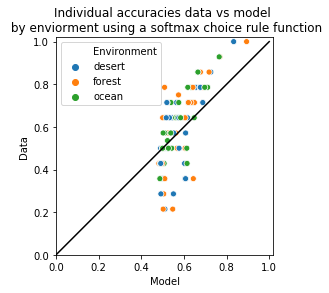

In [41]:
m = fitted.groupby(['Source', 'SubjNum', 'Environment'])['Accuracy'].mean().unstack(level=0)
g = sns.scatterplot(x='Model', y='Data', hue='Environment', data=m.reset_index());
g.set_xlim(0, 1.02);
g.set_ylim(0, 1.02);
g.set_aspect(1);
g.set_title('Individual accuracies data vs model \n by enviorment using a softmax choice rule function')
g.plot((0, 1), (0, 1), '-k');
fig = g.get_figure()
fig.savefig('enviorment_plot.png')

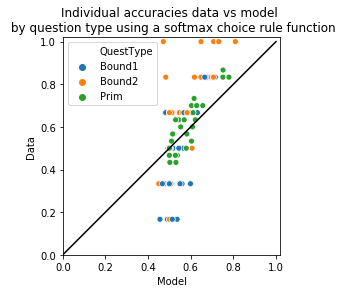

In [42]:
m = fitted.groupby(['Source', 'SubjNum', 'QuestType'])['Accuracy'].mean().unstack(level=0)
g = sns.scatterplot(x='Model', y='Data', hue='QuestType', data=m.reset_index());
g.set_xlim(0, 1.02);
g.set_ylim(0, 1.02);
g.set_aspect(1);
g.set_title('Individual accuracies data vs model \n by question type using a softmax choice rule function')
g.plot((0, 1), (0, 1), '-k');
fig = g.get_figure()
fig.savefig('question_plot.png')

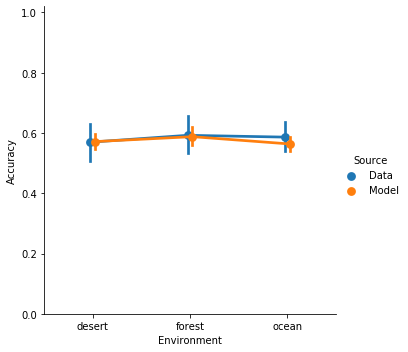

In [45]:
m = fitted.groupby(['Source', 'SubjNum', 'Environment'])['Accuracy'].mean()
g = sns.catplot(kind='point', x='Environment', y='Accuracy', 
                hue='Source', dodge=True, data=m.reset_index())
g.set(ylim=(0, 1.02));


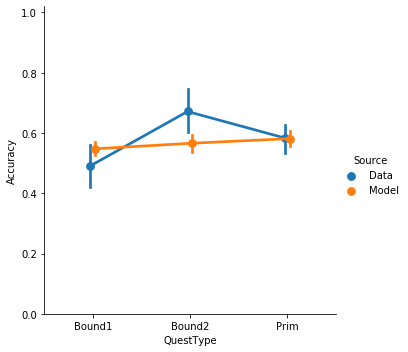

In [46]:
m = fitted.groupby(['Source', 'SubjNum', 'QuestType'])['Accuracy'].mean()
g = sns.catplot(kind='point', x='QuestType', y='Accuracy', 
                hue='Source', dodge=True, data=m.reset_index())
g.set(ylim=(0, 1.02));


In [25]:
np.savetxt(r'/home/rodrigo/Documents/preston_labs/tesser_successor/Data/indiv_params_softmax.txt', results, fmt='%d')